<div style=" background-color: RGB(155,34,66);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Organize store data management
</h2>
</div>

### Summary :

<a href="#C1">**Part 1: Importing libraries and loading files**
 - <a href="#C2">Importing libraries</a>
 - <a href="#C3">Importing excel files</a>
 
<a href="#C4">**Part 2: Exploratory file analysis**
 - <a href="#C5">Exploratory analysis of the ERP file</a>
 - <a href="#C6">Exploratory analysis of the WEB file</a>
 - <a href="#C7">Exploratory analysis of the LIAISON file</a>
 
<a href="#C8">**Part 3: Merging dataframes**
 
<a href="#C9">**Part 4: Calculating sales by product**

<a href="#C10">**Part 5: Analysis of variables**
 - <a href="#C11">Mode, Average, Median</a>
 - <a href="#C12">Variance, standard deviation, interquartile range</a>
 - <a href="#C13">Skewness</a>
 - <a href="#C14">Lorenz curve and Gini index</a>
 - <a href="#C15">Z-score</a>
 - <a href="#C16">Sort by category</a>
 
<a href="#C17">**Part 6: Correlation between two quantitative variables**
 - <a href="#C18">Scatter diagram</a>

<a name="C1">
<div style="background-color: RGB(155,34,66);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Step 1 - Importing libraries and loading files</h2>
</div>

<a name="C2">
<div style="border: 1px solid RGB(155,34,66));" >
<h3 style="margin: auto; padding: 20px; color: RGB(155,34,66); ">1.1 - Importing libraries</h3>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st
import statsmodels.api as sm

<a name="C3">
<div style="border: 1px solid RGB(155,34,66);" >
<h3 style="margin: auto; padding: 20px; color: RGB(155,34,66); ">1.2 - Importing Excel files</h3>
</div>

In [ ]:
#Importation file erp.xlsx
df_erp = pd.read_excel('erp.xlsx')

#Importation file web.xlsx
df_web = pd.read_excel('web.xlsx')

#Importation file liaison.xlsx
df_liaison = pd.read_excel('liaison.xlsx')

In [3]:
#NaN and duplicate cleaning function
def nettoyage_df(df, column1, column2):
    print("df initial size:", df.shape)
    
    if df[column1].duplicated().sum() > 0 :
        print("There are",df[column1].duplicated().sum(),"duplicates, eliminating duplicates")
    else:
        print("No duplicates")
        
    if df[column2].isna().sum() > 0 :
        print("there are",df[column2].isnull().sum(),"NaN values, eliminating NaN")
    else :
        print("No NaN values")
        
    if df[column1].duplicated().sum() > 0 :
        df.drop_duplicates(inplace=True, ignore_index=True)
        
    if df[column2].isnull().sum() > 0 :
        df.dropna(inplace=True)
        
    print("New size df :",df.shape)

<a name="C4">
<div style="background-color: RGB(155,34,66);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Step 2 - Exploratory file analysis</h2>
</div>

<a name="C5">
<div style="border: 1px solid RGB(155,34,66);" >
<h3 style="margin: auto; padding: 20px; color: RGB(155,34,66); ">2.1 - Exploratory analysis file ERP</h3>
</div>

In [4]:
#5 first rows
df_erp.head(5)

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [5]:
#Shape of the df
df_erp.shape

(825, 5)

In [6]:
#Keeping useful columns
df_erp_tri = df_erp[['product_id', 'price']]

In [7]:
#Analyzing the type of data in columns
df_erp_tri.dtypes

product_id      int64
price         float64
dtype: object

In [ ]:
#Transformation of product_id from int64 to object
df_erp_tri['product_id'] = df_erp_tri['product_id'].astype(str)
df_erp_tri.dtypes

In [9]:
#Cleaning of the df
nettoyage_df(df_erp_tri,'product_id', 'price')

df initial size: (825, 2)
No duplicates
No NaN values
New size df : (825, 2)


In [10]:
#Descriptive analysis 
df_erp_tri.describe(include='all')
#There are 825 unique values product_id for 825 rows, the unicity is validated for use as join key

,product_id,price
count,825,825.000000
unique,825,NaN
top,3847,NaN
freq,1,NaN
mean,NaN,32.415636
std,NaN,26.795849
min,NaN,5.200000
25%,NaN,14.600000
50%,NaN,24.400000
75%,NaN,42.000000


<a name="C6">
<div style="border: 1px solid RGB(155,34,66);" >
<h3 style="margin: auto; padding: 20px; color: RGB(155,34,66); ">2.2 - Exploratory analysis file WEB</h3>
</div>

In [11]:
#5 first rows
df_web.head(5)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [12]:
#Shape of the df
df_web.shape

(1513, 28)

In [13]:
#Keeping useful columns
df_web_tri = df_web[['sku', 'total_sales', 'post_name']]

In [14]:
#Analysis of the data types of columns
df_web_tri.dtypes

sku             object
total_sales    float64
post_name       object
dtype: object

In [15]:
df_web_tri.describe(include='all')
#There are 714 unique sku values for 1428 rows, unicity not validated, duplicates check required

,sku,total_sales,post_name
count,1428,1430.000000,1430
unique,714,NaN,716
top,bon-cadeau-25-euros,NaN,bon-cadeau-de-25-euros
freq,2,NaN,2
mean,NaN,4.006993,NaN
std,NaN,8.510559,NaN
min,NaN,0.000000,NaN
25%,NaN,0.000000,NaN
50%,NaN,1.000000,NaN
75%,NaN,4.000000,NaN


In [16]:
#Cleaning of the df with function
nettoyage_df(df_web_tri,'sku', 'total_sales')

df initial size: (1513, 3)
There are 798 duplicates, eliminating duplicates
there are 83 NaN values, eliminating NaN
New size df : (714, 3)


/var/folders/ys/x9zrppb9483b7ncwjcb1t25m0000gn/T/ipykernel_91205/529529188.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True, ignore_index=True)
/var/folders/ys/x9zrppb9483b7ncwjcb1t25m0000gn/T/ipykernel_91205/529529188.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [17]:
#Recheck values unicity
df_web_tri.describe(include='all')

#There are 714 rows and 714 unique sku values (unicity of key validated)

,sku,total_sales,post_name
count,714,714.000000,714
unique,714,NaN,714
top,bon-cadeau-25-euros,NaN,bon-cadeau-de-25-euros
freq,1,NaN,1
mean,NaN,4.012605,NaN
std,NaN,8.518183,NaN
min,NaN,0.000000,NaN
25%,NaN,0.000000,NaN
50%,NaN,1.000000,NaN
75%,NaN,4.000000,NaN


<a name="C7">
<div style="border: 1px solid RGB(155,34,66);" >
<h3 style="margin: auto; padding: 20px; color: RGB(155,34,66); ">2.3- Exploratory analysis file LIAISON</h3>
</div>

In [18]:
#5 first rows
df_liaison.head(5)

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [19]:
#Columns data type
df_liaison.dtypes

product_id     int64
id_web        object
dtype: object

In [20]:
#Change column product_id data type in object
df_liaison['product_id'] = df_liaison['product_id'].astype(str)
df_liaison.dtypes

product_id    object
id_web        object
dtype: object

In [21]:
#Column id_web corresponding to sku, renaming
df_liaison.rename(columns={'id_web':'sku'}, inplace=True)

In [22]:
#Cleaning function on df
nettoyage_df(df_liaison,'product_id', 'sku')

df initial size: (825, 2)
No duplicates
there are 91 NaN values, eliminating NaN
New size df : (734, 2)


In [23]:
df_liaison.describe(include='all')
#The number of rows correspond to unique values product_id et sku, the unicity of keys are validated.

,product_id,sku
count,734,734
unique,734,734
top,3847,15298
freq,1,1


<a name="C8">
<div style="background-color: RGB(155,34,66);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Step 3 - Merging dataframes</h2>
</div>

In [24]:
#Verification correspondence sku keys between liaison and web file 
#Number values sku = 714
df_web_tri['sku'].isin(df_liaison['sku']).sum()
#All sku values are in file liaison

714

In [25]:
#Verification correspondence product_id keys between liaison and erp file 
#Number values product_id = 825
df_erp_tri['product_id'].isin(df_liaison['product_id']).sum()
#There are 825-734 = 91 values that are not in the file liaison

734

In [26]:
#Display product_id not present in file liaison
df_erp_tri.loc[df_erp_tri['product_id'].isin(df_liaison['product_id'])==False]
#All keys product_id do not have correspondence in file liaison, merge type chosen consequently = outer 

,product_id,price
19,4055,86.1
49,4090,73.0
50,4092,47.0
119,4195,14.1
131,4209,73.5
...,...,...
817,7196,31.0
818,7200,31.0
819,7201,31.0
820,7203,45.0


In [27]:
#Merging dataframes
df_erp_liaison = pd.merge(df_erp_tri, df_liaison, on='product_id', how='outer')
df_final = pd.merge(df_erp_liaison, df_web_tri, on='sku', how='outer')
df_final.head(5)

,product_id,price,sku,total_sales,post_name
0,3847,24.2,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018
1,3849,34.3,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017
2,3850,20.8,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...
3,4032,14.1,19814,3.0,pierre-jean-villa-igp-gamine-2018
4,4039,46.0,19815,0.0,pierre-jean-villa-cote-rotie-carmina-2017


In [28]:
#Shape df 
df_final.shape

(825, 5)

In [29]:
#Null values check
df_final.isnull().sum()

product_id       0
price            0
sku             91
total_sales    111
post_name      111
dtype: int64

In [30]:
#Sku null values analysis
valeur_manquante_sku = df_final.loc[df_final['sku'].isnull(),:]
print(valeur_manquante_sku.to_string())

    product_id  price  sku  total_sales post_name
19        4055   86.1  NaN          NaN       NaN
20        4090   73.0  NaN          NaN       NaN
21        4092   47.0  NaN          NaN       NaN
22        4195   14.1  NaN          NaN       NaN
23        4209   73.5  NaN          NaN       NaN
24        4233   20.0  NaN          NaN       NaN
25        4278   21.5  NaN          NaN       NaN
26        4279   10.8  NaN          NaN       NaN
27        4565   30.5  NaN          NaN       NaN
28        4577   49.0  NaN          NaN       NaN
29        4578   40.0  NaN          NaN       NaN
30        4594  144.0  NaN          NaN       NaN
31        4599   36.9  NaN          NaN       NaN
32        4659   23.6  NaN          NaN       NaN
33        4692   12.0  NaN          NaN       NaN
34        4693   18.5  NaN          NaN       NaN
35        4697   34.5  NaN          NaN       NaN
36        4698   20.5  NaN          NaN       NaN
37        4702   23.8  NaN          NaN       NaN


In [31]:
#total_sales null values analysis
valeur_manquante_total_sales = df_final.loc[df_final['total_sales'].isnull(),:]
print(valeur_manquante_total_sales.to_string())

    product_id  price      sku  total_sales post_name
19        4055   86.1      NaN          NaN       NaN
20        4090   73.0      NaN          NaN       NaN
21        4092   47.0      NaN          NaN       NaN
22        4195   14.1      NaN          NaN       NaN
23        4209   73.5      NaN          NaN       NaN
24        4233   20.0      NaN          NaN       NaN
25        4278   21.5      NaN          NaN       NaN
26        4279   10.8      NaN          NaN       NaN
27        4565   30.5      NaN          NaN       NaN
28        4577   49.0      NaN          NaN       NaN
29        4578   40.0      NaN          NaN       NaN
30        4594  144.0      NaN          NaN       NaN
31        4599   36.9      NaN          NaN       NaN
32        4659   23.6      NaN          NaN       NaN
33        4692   12.0      NaN          NaN       NaN
34        4693   18.5      NaN          NaN       NaN
35        4697   34.5      NaN          NaN       NaN
36        4698   20.5      N

In [32]:
#Verification if null values are common between 2 columns
valeur_manquante_sku.isin(valeur_manquante_total_sales['sku'])
#This shows that in the 111 NaN of total_sales there are the 91 NaN of sku

,product_id,price,sku,total_sales,post_name
19,False,False,False,False,False
20,False,False,False,False,False
21,False,False,False,False,False
22,False,False,False,False,False
23,False,False,False,False,False
...,...,...,...,...,...
105,False,False,False,False,False
106,False,False,False,False,False
107,False,False,False,False,False
108,False,False,False,False,False


In [33]:
#Droping NaN, because the information of total_sales are unknown, not useful
df_final.dropna(inplace=True)
df_final.isnull().sum()

product_id     0
price          0
sku            0
total_sales    0
post_name      0
dtype: int64

In [34]:
#Shape of final dataframe
df_final.shape

(714, 5)

<a name="C9">
<div style="background-color: RGB(155,34,66);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Step 4 - Calculating revenues by product</h2>
</div>

In [35]:
#Revenues by product
df_final['revenue'] = df_final['price']*df_final['total_sales']
df_final.sort_values(by=['revenue'], ascending=False)

,product_id,price,sku,total_sales,post_name,revenue
286,4334,49.0,7818,96.0,champagne-gosset-grand-blanc-de-blanc,4704.0
162,4144,49.0,1662,87.0,champagne-gosset-grand-rose,4263.0
310,4402,176.0,3510,13.0,cognac-frapin-vip-xo,2288.0
161,4142,53.0,11641,30.0,champagne-gosset-grand-millesime-2006,1590.0
160,4141,39.0,304,40.0,gosset-champagne-grande-reserve,1560.0
...,...,...,...,...,...,...
447,4791,13.6,14599,0.0,maurice-schoech-pinot-noir-piece-de-chene-2016,0.0
446,4790,11.1,15732,0.0,maurice-schoech-riesling-2018,0.0
443,4786,12.1,15881,0.0,maurice-schoech-gewurztraminer-2018,0.0
441,4784,28.5,15734,0.0,maurice-schoech-riesling-vendanges-tardives-2017,0.0


In [36]:
#Global revenue
print("The global revenue is ", df_final['revenue'].sum(),"€")

The global revenue is  70568.6 €


<function matplotlib.pyplot.show(close=None, block=None)>

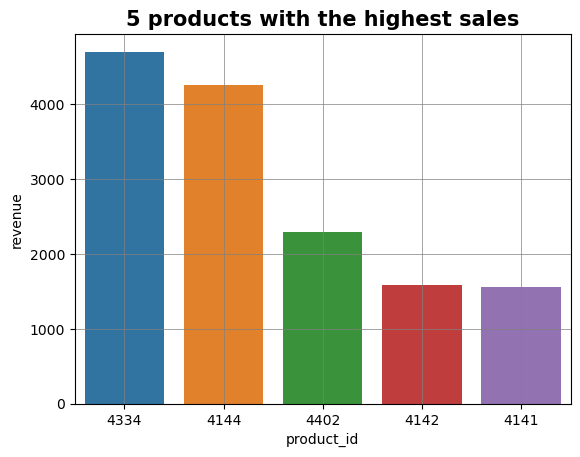

In [37]:
#Display 5 products with highest revenue
df_final['revenue'] = df_final['price']*df_final['total_sales']
revenue = df_final.sort_values(by=['revenue'], ascending=False).head(5)

sns.barplot(data=revenue, x='product_id', y='revenue')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.title("5 products with the highest sales", fontsize = 15, fontweight='bold')
         
plt.show

<a name="C10">
<div style="background-color: RGB(155,34,66);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Step 5 - Analysis of variables</h2>
</div>

<a name="C11">
<div style="border: 1px solid RGB(155,34,66);" >
<h3 style="margin: auto; padding: 20px; color: RGB(155,34,66); ">5.1 - Mode, Average and Median</h3>
</div>

In [38]:
#Most frequent price
print('The most common price is', round(df_final['price'].mode(),2))
#Average price, excluding outliers
print('The average price of the products is', round(df_final['price'].mean(),2),'€')
#Price median, excluding outliers
print('The median price is', round(df_final['price'].median(),2),'€')

The most common price is 0    19.0
Name: price, dtype: float64
The average price of the products is 32.49 €
The median price is 23.55 €


<a name="C12">
<div style="border: 1px solid RGB(155,34,66);" >
<h3 style="margin: auto; padding: 20px; color: RGB(155,34,66); ">5.2 - Variance, standard deviation, interquartile range</h3>
</div>

In [39]:
#Variance calculation (since this is a population and not a sample, empirical calculation)
print('The variance is', round(df_final['price'].var(),2))
#Calculation of standard deviation (as this is a population and not a sample, empirical calculation)
print("The standard deviation is", round(df_final['price'].std(),2), "€")
#Calculating the coefficient of variation
print("The coefficient of variation is", round(df_final['price'].std()/df_final['price'].mean()*100,2),"%")

print("Based on these results, we can conclude that there is a wide disparity in prices.")

The variance is 773.43
The standard deviation is 27.81 €
The coefficient of variation is 85.59 %
Based on these results, we can conclude that there is a wide disparity in prices.


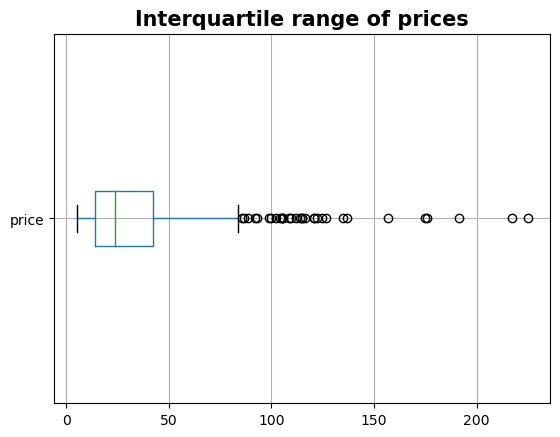

In [40]:
#Interquartile range
df_final.boxplot(column="price", vert=False)
plt.title("Interquartile range of prices", fontsize = 15, fontweight='bold')
plt.show()

<a name="C13">
<div style="border: 1px solid RGB(155,34,66);" >
<h3 style="margin: auto; padding: 20px; color: RGB(155,34,66); ">5.3 - Skewness</h3>
</div>

<function matplotlib.pyplot.show(close=None, block=None)>

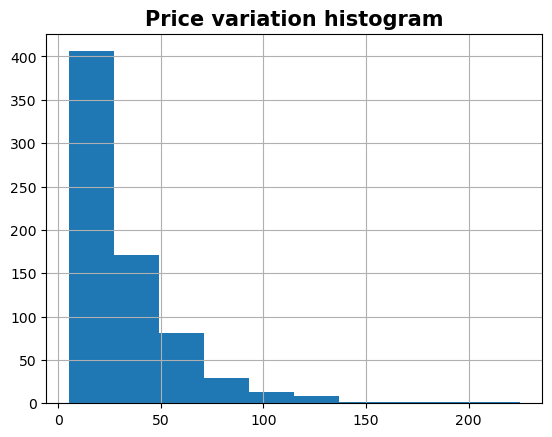

In [41]:
#I display a histogram to see price variations
df_final['price'].hist()
plt.title("Price variation histogram", fontsize = 15, fontweight='bold')
plt.show

In [42]:
#Skewness calculation
print("The skewness is", round((df_final['price'].skew()),2), ", the latter being >0, the distribution is spread to the right")

The skewness is 2.58 , the latter being >0, the distribution is spread to the right


<a name="C14">
<div style="border: 1px solid RGB(155,34,66);" >
<h3 style="margin: auto; padding: 20px; color: RGB(155,34,66); ">5.4 - Lorenz curve and Gini index </h3>
</div>

<function matplotlib.pyplot.show(close=None, block=None)>

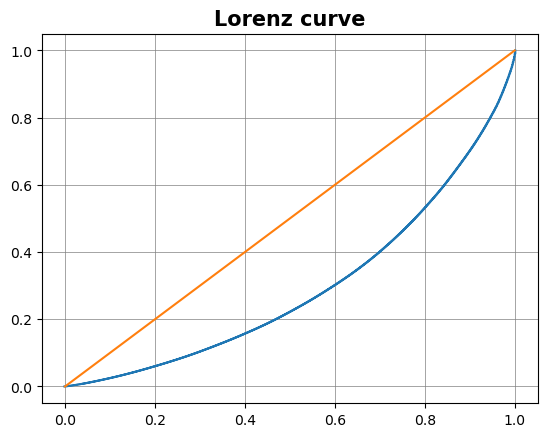

In [43]:
price = df_final['price']
n = len(price)
lorenz = np.cumsum(np.sort(price))/price.sum()
lorenz = np.append([0],lorenz)

xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1], [0,1]) #bisséctrice
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.title("Lorenz curve", fontsize = 15, fontweight='bold')
plt.show

In [52]:
#Gini index
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n

S = 0.5 - AUC
gini = 2*S
print("the Gini index is",round(gini,2))
print("the Gini index shows us that bottle prices are globally concentrated")

the Gini index is 0.41
the Gini index shows us that bottle prices are globally concentrated


<a name="C15">
<div style="border: 1px solid RGB(155,34,66);" >
<h3 style="margin: auto; padding: 20px; color: RGB(155,34,66); ">5.5 - Z-score</h3>
</div>

In [45]:
#I calculate the Zscore to allow us to sort outliers
df_final['zscore'] = st.zscore(df_final['price'])
df_final.head(5)

,product_id,price,sku,total_sales,post_name,revenue,zscore
0,3847,24.2,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018,145.2,-0.298410
1,3849,34.3,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017,0.0,0.065016
2,3850,20.8,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...,0.0,-0.420752
3,4032,14.1,19814,3.0,pierre-jean-villa-igp-gamine-2018,42.3,-0.661837
4,4039,46.0,19815,0.0,pierre-jean-villa-cote-rotie-carmina-2017,0.0,0.486015


In [46]:
#I filter values with a Zscore >=2
df_final.loc[df_final['zscore']>=2].sort_values(by=['zscore'], ascending=False)

,product_id,price,sku,total_sales,post_name,revenue,zscore
291,4352,225.0,15940,5.0,champagne-egly-ouriet-grand-cru-millesime-2008,1125.0,6.926939
525,5001,217.5,14581,0.0,david-duband-charmes-chambertin-grand-cru-2014,0.0,6.657068
692,5892,191.3,14983,3.0,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,573.9,5.714318
310,4402,176.0,3510,13.0,cognac-frapin-vip-xo,2288.0,5.163781
657,5767,175.0,15185,0.0,camille-giroud-clos-de-vougeot-2016,0.0,5.127798
313,4406,157.0,7819,0.0,cognac-frapin-chateau-de-fontpinot-1989-20-ans,0.0,4.480108
478,4904,137.0,14220,5.0,domaine-des-croix-corton-charlemagne-grand-cru...,685.0,3.760451
752,6126,135.0,14923,2.0,champagne-gosset-celebris-vintage-2007,270.0,3.688486
293,4355,126.5,12589,11.0,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,1391.5,3.382632
615,5612,124.8,14915,0.0,domaine-weinbach-gewurztraminer-gc-furstentum-...,0.0,3.321461


In [47]:
#Filter out values with a zscore >-2
df_final.loc[df_final['zscore']<-2].sort_values(by=['zscore'])

,product_id,price,sku,total_sales,post_name,revenue,zscore


In [48]:
#Number of outliers
print("The number of outliers is", len(df_final.loc[df_final['zscore']>=2].sort_values(by=['zscore'], ascending=False)))

The number of outliers is 30


<a name="C16">
<div style="border: 1px solid RGB(155,34,66);" >
<h3 style="margin: auto; padding: 20px; color: RGB(155,34,66); ">5.6 - Sort by price category</h3>
</div>

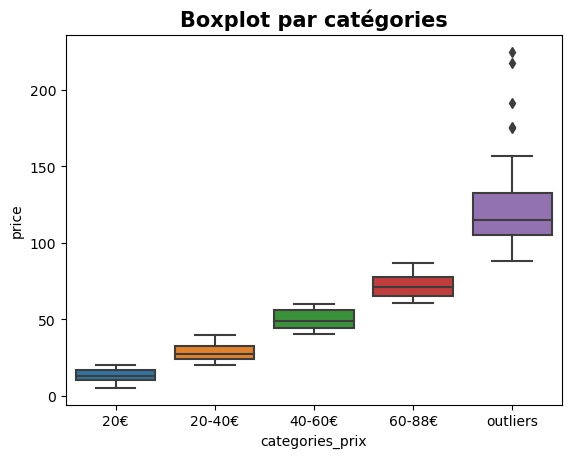

In [53]:
#Prices being different, classificatiton by price category
df_final['categories_prix'] = 0
df_final.loc[df_final['price'] <= 20, 'categories_prix'] = '20€'
df_final.loc[(df_final['price'] > 20) & (df_final['price'] <= 40), 'categories_prix'] = '20-40€'
df_final.loc[(df_final['price'] > 40) & (df_final['price'] <= 60), 'categories_prix'] = '40-60€'
df_final.loc[(df_final['price'] > 60) & (df_final['price'] <= 88), 'categories_prix'] = '60-88€'
df_final.loc[df_final['price'] > 88, 'categories_prix'] = 'outliers'

sns.boxplot(y='price', x='categories_prix', data=df_final.sort_values(by=['price'], ascending=True), orient='v')
plt.title("Boxplot par catégories", fontsize = 15, fontweight='bold')
plt.show()

<a name="C17">
<div style="background-color: RGB(155,34,66);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Step 6 - Correlation between two quantitative variables</h2>
</div>

<a name="C18">
<div style="border: 1px solid RGB(155,34,66);" >
<h3 style="margin: auto; padding: 20px; color: RGB(155,34,66); ">6.1 - Dispersion diagramme</h3>
</div>

<function matplotlib.pyplot.show(close=None, block=None)>

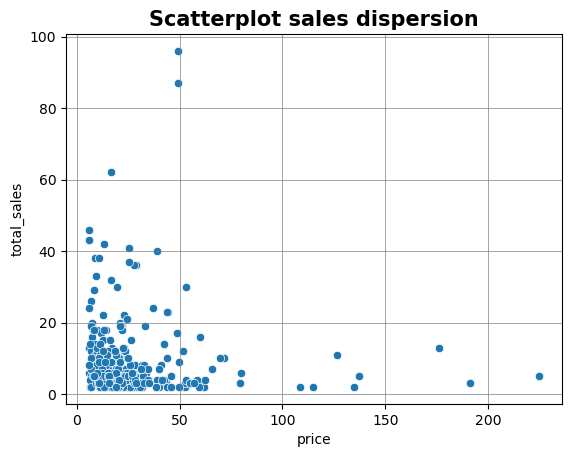

In [54]:
#Scatter plot to check if there is a relationship between the price and the number of sales.
diagramme = df_final.loc[df_final['total_sales']>1,:]
sns.scatterplot(data=diagramme, x='price', y='total_sales')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.title("Scatterplot sales dispersion", fontsize = 15, fontweight='bold')
plt.show